In [1]:
# From www.analyticsvidhya.com

# Importing libraries
import pandas as pd
import numpy as np
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import datasets
import matplotlib.lines as mlines

def euclideanDistance(data1, data2, length): # a function which calculates euclidean distance between two data points [4,6,7]
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# ====== Defining our KNN model
def knn(trainingSet, testInstance, k):
    distances = {}
    sort = {} 
    length = testInstance.shape[1]
    #### Start of STEP 3, Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):  
        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
        #### End of STEP 3.1
 
    #### Start of STEP 3.2, Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    #### Start of STEP 3.3, Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}
    
    #### Start of STEP 3.4,  Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5

In [8]:
#### Start of STEP 1, Importing data 
data = pd.read_csv("iris.csv")
#### End of STEP 1

# Creating a sample testset
testSet = [[4.0, 0.5, 3.0, 1.0]]
test = pd.DataFrame(testSet)

In [9]:
iris_setosa=data.loc[data["Name"]=="Iris-setosa"]
iris_virginica=data.loc[data["Name"]=="Iris-virginica"]
iris_versicolor=data.loc[data["Name"]=="Iris-versicolor"]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\s

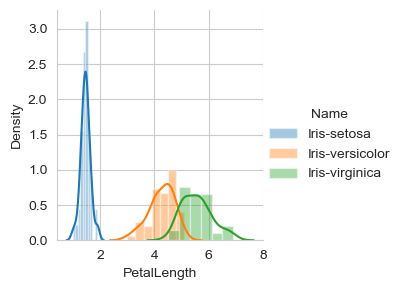

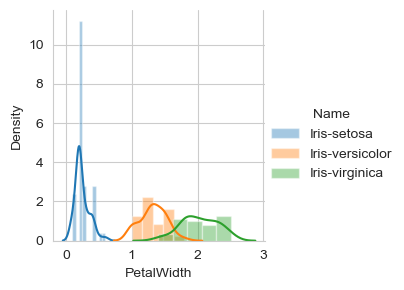

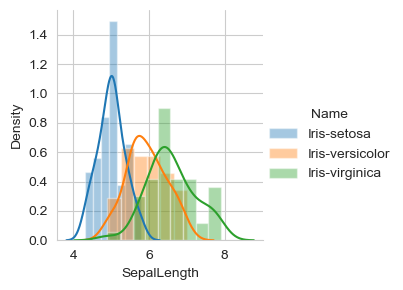

In [10]:
# sns.FacetGrid(data, hue="Name").map(sns.histplot, "PetalLength", kde=True).add_legend()
# sns.FacetGrid(data, hue="Name").map(sns.histplot, "PetalWidth", kde=True).add_legend()
# sns.FacetGrid(data, hue="Name").map(sns.histplot, "SepalLength", kde=True).add_legend()
# plt.show()
sns.FacetGrid(data, hue="Name", height=3).map(sns.distplot, "PetalLength").add_legend()
plt.savefig('plot0.svg', format='svg')
sns.FacetGrid(data, hue="Name", height=3).map(sns.distplot, "PetalWidth").add_legend()
plt.savefig('plot1.svg', format='svg')
sns.FacetGrid(data, hue="Name", height=3).map(sns.distplot, "SepalLength").add_legend()
plt.savefig('plot2.svg', format='svg')
plt.show()

In [11]:

# # Special point to be added
# special_point = pd.DataFrame({'SepalLength': [4.0], 'SepalWidth': [0.5], 'PetalLength': [3.0], 'PetalWidth': [1.0], 'Cluster': ['Special Point']})
# 
# # Create the pair plot
# g = sns.pairplot(data, hue='Name', diag_kind='kde', palette='viridis')
# 
# # Mapping the axis labels to the actual feature names
# label_map = {
#     'SepalLength': 'SepalLength',
#     'SepalWidth': 'SepalWidth',
#     'PetalLength': 'PetalLength',
#     'PetalWidth': 'PetalWidth'
# }
# 
# # Overlay the special point on every subplot
# for ax in g.axes.flatten():
#     # Get the x and y axis labels
#     xlabel = ax.get_xlabel()
#     ylabel = ax.get_ylabel()
# 
#     # Only attempt to plot if both labels are not empty
#     if xlabel and ylabel:
#         # Plot the special point on each subplot
#         ax.scatter(special_point[label_map[xlabel]], special_point[label_map[ylabel]],
#                    color='red', marker='*', s=200, label='Special Point')
# 
# # Show the plot with the special point on each subplot
# plt.legend(['Special Point'])
# plt.show()

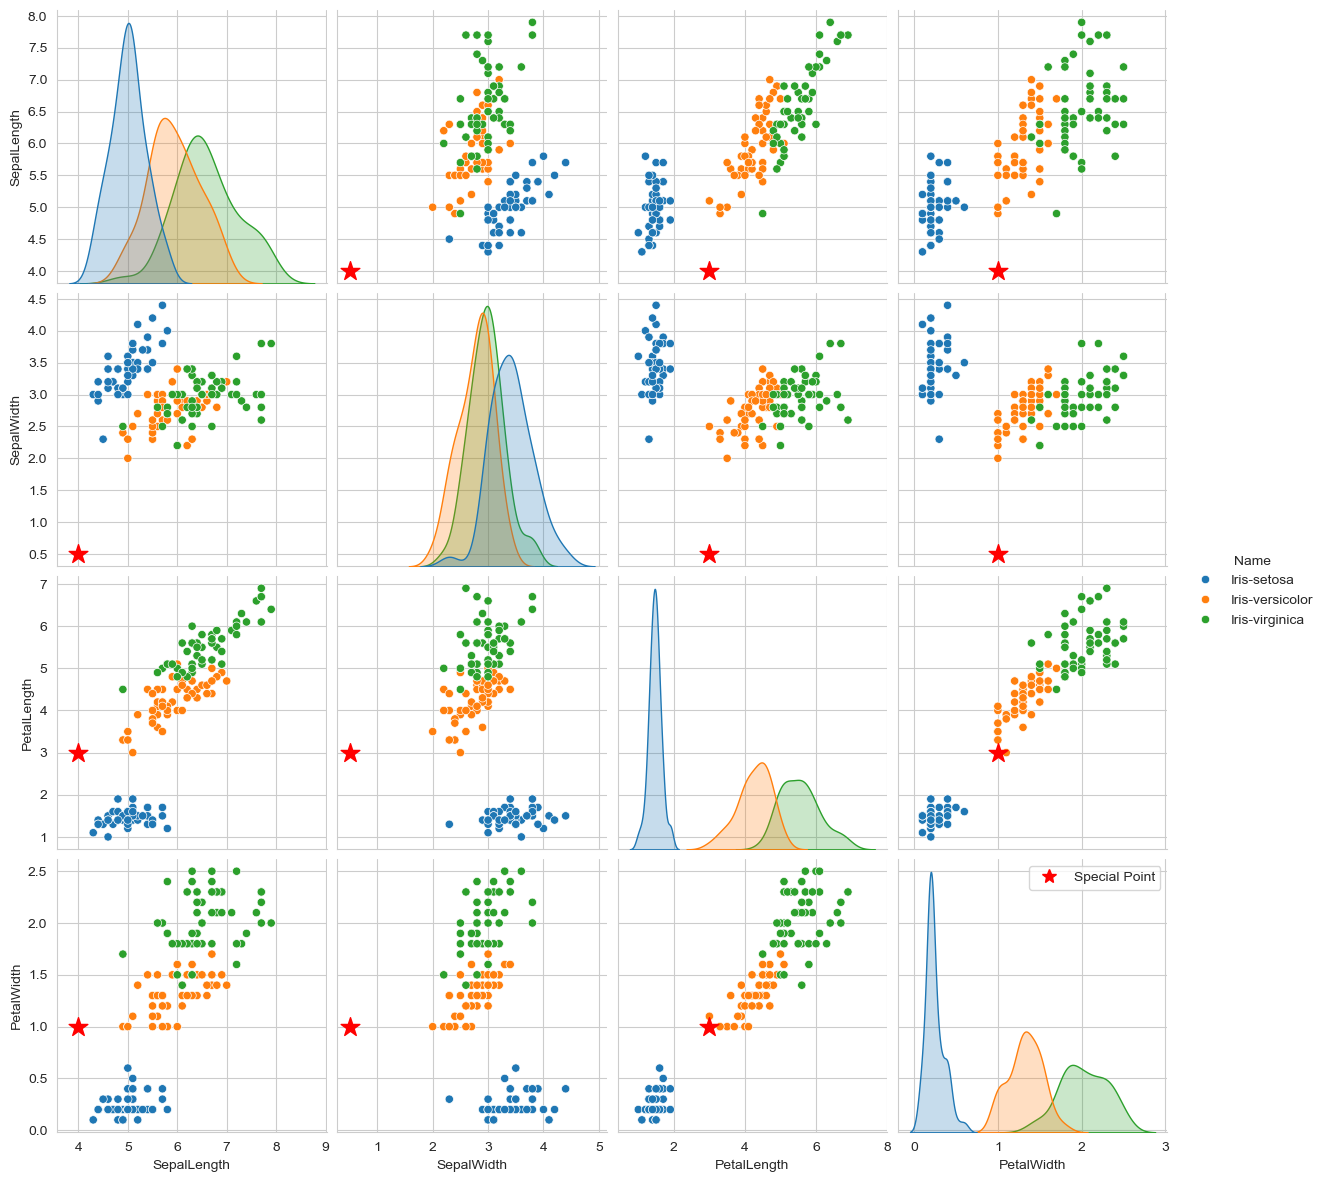

In [12]:
# Special point to be added
special_point = pd.DataFrame({'SepalLength': [4.0], 'SepalWidth': [0.5], 'PetalLength': [3.0], 'PetalWidth': [1.0], 'Cluster': ['Special Point']})
sns.set_style("whitegrid")
g = sns.pairplot(data,hue="Name",height=3)
label_map = {
    'SepalLength': 'SepalLength',
    'SepalWidth': 'SepalWidth',
    'PetalLength': 'PetalLength',
    'PetalWidth': 'PetalWidth'
}
for ax in g.axes.flatten():
    # Get the x and y axis labels
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()

    # Only attempt to plot if both labels are not empty
    if xlabel and ylabel:
        # Plot the special point on each subplot
        ax.scatter(special_point[label_map[xlabel]], special_point[label_map[ylabel]],
                   color='red', marker='*', s=200, label='Special Point')

# Creating a custom legend for the special point
special_legend = mlines.Line2D([], [], color='red', marker='*', linestyle='None', markersize=10, label='Special Point')

# Adding the custom legend
plt.legend(handles=[special_legend], loc='upper right')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

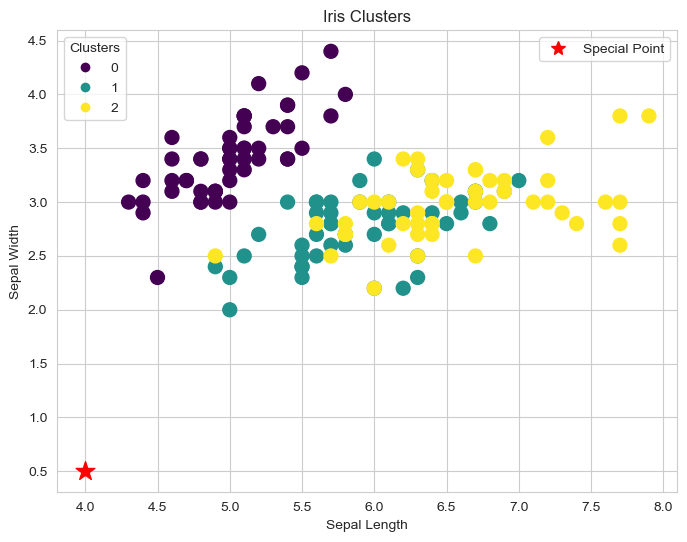

In [16]:
label_encoder = LabelEncoder()
data['Cluster'] = label_encoder.fit_transform(data['Name'])
# Special point coordinates
special_point = [4.0, 0.5]  # SepalLength, SepalWidth

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['SepalLength'], data['SepalWidth'], c=data['Cluster'], cmap='viridis', s=100)

# Plotting the special point
plt.scatter(special_point[0], special_point[1], color='red', marker='*', s=200)

# Adding labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Clusters')

# Adding legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Creating a custom legend for the special point
special_legend = mlines.Line2D([], [], color='red', marker='*', linestyle='None', markersize=10, label='Special Point')

# Adding the custom legend
plt.legend(handles=[special_legend], loc='upper right')

# Show the plot
plt.show()

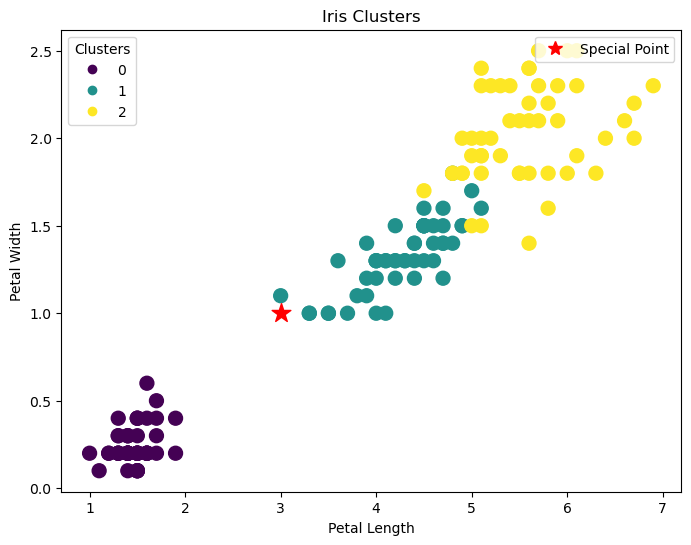

In [36]:
# Special point coordinates
special_point = [3.0, 1.0]  # SepalLength, SepalWidth

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['PetalLength'], data['PetalWidth'], c=data['Cluster'], cmap='viridis', s=100)

# Plotting the special point
plt.scatter(special_point[0], special_point[1], color='red', marker='*', s=200)

# Adding labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Clusters')

# Adding legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Creating a custom legend for the special point
special_legend = mlines.Line2D([], [], color='red', marker='*', linestyle='None', markersize=10, label='Special Point')

# Adding the custom legend
plt.legend(handles=[special_legend], loc='upper right')

# Show the plot
plt.show()

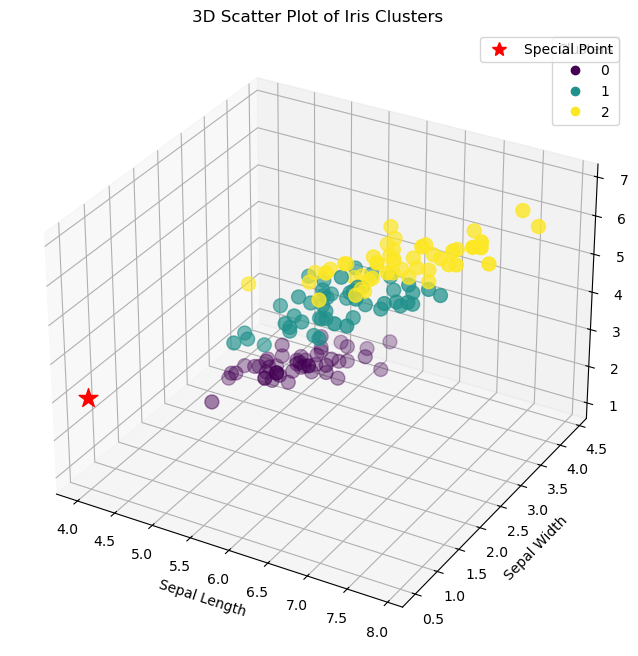

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot using SepalLength, SepalWidth, and PetalLength with color by Cluster
scatter = ax.scatter(data['SepalLength'], data['SepalWidth'], data['PetalLength'], 
                     c=data['Cluster'], cmap='viridis', s=100)

# Adding labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Clusters')

# Plot the special point
ax.scatter(4.0, 0.5, 3.0, color='red', marker='*', s=200, label='Special Point')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Creating a custom legend for the special point
special_legend = mlines.Line2D([], [], color='red', marker='*', linestyle='None', markersize=10, label='Special Point')

# Adding the custom legend
plt.legend(handles=[special_legend], loc='upper right')

plt.show()

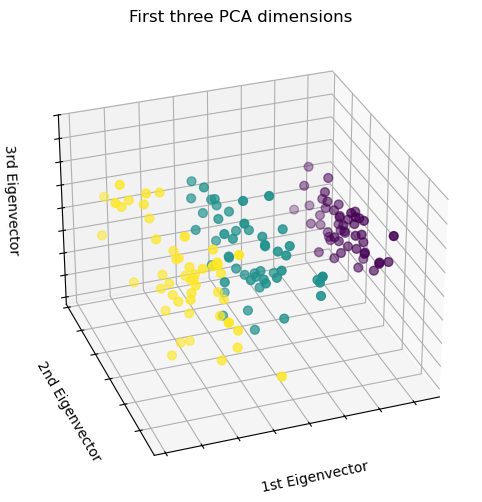

In [39]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA
iris = datasets.load_iris()
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [26]:
#### Start of STEP 2
# Setting number of neighbors (K)
k = 1
#### End of STEP 2

# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print(result)

# Nearest neighbor(s)
print(neigh)


Iris-virginica
[114]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3088\4125910429.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += np.square(data1[x] - data2[x])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3088\4125910429.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  response = trainingSet.iloc[neighbors[x]][-1]


In [6]:
test.shape[1]

4

In [7]:

distances = {}
sort = {} 
length = test.shape[1]    
#### Start of STEP 3, Calculating euclidean distance between each row of training data and test data
for x in range(len(data)):  
    #### Start of STEP 3.1
    dist = euclideanDistance(test, data.iloc[x], length)
    distances[x] = dist[0]
    #### End of STEP 3.1

#### Start of STEP 3.2, Sorting them on the basis of distance
sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
#### End of STEP 3.2

neighbors = []

#### Start of STEP 3.3, Extracting top k neighbors
for x in range(k):
    neighbors.append(sorted_d[x][0])
#### End of STEP 3.3
classVotes = {}

#### Start of STEP 3.4,  Calculating the most freq class in the neighbors
for x in range(len(neighbors)):
    response = data.iloc[neighbors[x]][-1]

    if response in classVotes:
        classVotes[response] += 1
    else:
        classVotes[response] = 1
#### End of STEP 3.4

#### Start of STEP 3.5
sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
#return(sortedVotes[0][0], neighbors)

C:\Users\Parsa\AppData\Local\Temp\ipykernel_19428\1672883496.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += np.square(data1[x] - data2[x])
C:\Users\Parsa\AppData\Local\Temp\ipykernel_19428\2149650648.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  response = data.iloc[neighbors[x]][-1]


In [8]:
distances

{0: 3.661966684720111,
 1: 3.203123475609394,
 2: 3.363034344160048,
 3: 3.1638584039112754,
 4: 3.7161808352124095,
 5: 3.9458839313897713,
 6: 3.438022687534217,
 7: 3.5071355833500366,
 8: 3.0199337741083,
 9: 3.2603680773802215,
 10: 3.8845849199110067,
 11: 3.4132096331752027,
 12: 3.2031234756093934,
 13: 3.280243893371345,
 14: 4.401136216933077,
 15: 4.550824101193101,
 16: 4.095119045888654,
 17: 3.641428291206625,
 18: 3.994996871087636,
 19: 3.8522720568516444,
 20: 3.5637059362410923,
 21: 3.749666651850535,
 22: 3.8223029707232787,
 23: 3.315116890850155,
 24: 3.301514803843836,
 25: 3.138470965295043,
 26: 3.4249087579087414,
 27: 3.6510272527057372,
 28: 3.612478373637689,
 29: 3.2218007387174024,
 30: 3.1622776601683795,
 31: 3.6027767069303644,
 32: 4.178516483155235,
 33: 4.374928570845472,
 34: 3.2603680773802215,
 35: 3.488552708502482,
 36: 3.844476557348217,
 37: 3.2603680773802215,
 38: 3.1527765540868895,
 39: 3.5369478367654787,
 40: 3.6578682316343767,
 41: 2.